# Building a Libor Curve

In [26]:
# This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; 
# without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  
# See the license for more details.

Simple introduction to the inputs required to define a Libor deposit and a FRA

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from financepy.finutils.FinDate import FinDate
from financepy.finutils.FinDayCount import FinDayCountTypes
from financepy.finutils.FinFrequency import FinFrequencyTypes
from financepy.finutils.FinCalendar import *
from financepy.market.curves.FinLiborCurve import FinLiborCurve
from financepy.products.libor.FinLiborFRA import FinLiborFRA
from financepy.products.libor.FinLiborDeposit import FinLiborDeposit
from financepy.products.libor.FinLiborSwap import FinLiborSwap

## Creating the Libor Instruments

In [15]:
valuationDate = FinDate(18, 9, 2019)

### Load up the deposits first

In [16]:
depoDCCType = FinDayCountTypes.THIRTY_E_360_ISDA
depos = []

spotDays = 2
settlementDate = valuationDate.addWorkDays(spotDays)

depositRate = 0.050
maturityDate = settlementDate.addMonths(1)
depo = FinLiborDeposit(settlementDate, maturityDate, depositRate, depoDCCType)
depos.append(depo)

maturityDate = settlementDate.addMonths(3)
depo = FinLiborDeposit(settlementDate, maturityDate, depositRate, depoDCCType)
depos.append(depo)

maturityDate = settlementDate.addMonths(6)
depo = FinLiborDeposit(settlementDate, maturityDate, depositRate, depoDCCType)
depos.append(depo)

maturityDate = settlementDate.addMonths(9)
depo = FinLiborDeposit(settlementDate, maturityDate, depositRate, depoDCCType)
depos.append(depo)

maturityDate = settlementDate.addMonths(12)
depo = FinLiborDeposit(settlementDate, maturityDate, depositRate, depoDCCType)
depos.append(depo)

### Then we load up the FRAs

In [17]:
# 1 x 4 FRA
payFixed = True
notional = 1000
fras = []

fraRate = 0.05
fraSettlementDate = settlementDate.addMonths(12)
fraMaturityDate = settlementDate.addMonths(16)
fra = FinLiborFRA(fraSettlementDate, fraMaturityDate, fraRate, depoDCCType)
fras.append(fra)

# 4 x 7 FRA
fraRate = 0.08
fraSettlementDate = settlementDate.addMonths(16)
fraMaturityDate = settlementDate.addMonths(20)
fra = FinLiborFRA(fraSettlementDate, fraMaturityDate, fraRate, depoDCCType)
fras.append(fra)

### Then we load up swap rates

In [18]:
swaps = []
fixedDCCType = FinDayCountTypes.ACT_365_ISDA
fixedFreqType = FinFrequencyTypes.SEMI_ANNUAL

swapRate = 0.050
maturityDate = settlementDate.addMonths(24)
swap = FinLiborSwap(settlementDate, maturityDate, swapRate, fixedFreqType, fixedDCCType)
swaps.append(swap)

swapRate = 0.052
maturityDate = settlementDate.addMonths(36)
swap = FinLiborSwap(settlementDate, maturityDate, swapRate, fixedFreqType, fixedDCCType)
swaps.append(swap)

swapRate = 0.0535
maturityDate = settlementDate.addMonths(48)
swap = FinLiborSwap(settlementDate, maturityDate, swapRate, fixedFreqType, fixedDCCType)
swaps.append(swap)

swapRate = 0.055
maturityDate = settlementDate.addMonths(60)
swap = FinLiborSwap(settlementDate, maturityDate, swapRate, fixedFreqType, fixedDCCType)
swaps.append(swap)

swapRate = 0.0565
maturityDate = settlementDate.addMonths(84)
swap = FinLiborSwap(settlementDate, maturityDate, swapRate, fixedFreqType, fixedDCCType)
swaps.append(swap)

swapRate = 0.057
maturityDate = settlementDate.addMonths(120)
swap = FinLiborSwap(settlementDate, maturityDate, swapRate, fixedFreqType, fixedDCCType)
swaps.append(swap)

In [19]:
liborCurve = FinLiborCurve("USD_LIBOR", settlementDate, depos, fras, swaps)

In [20]:
print(liborCurve)

TIME: DISCOUNT FACTOR
0.0: 1.0
0.08213732265183084: 0.995850622406639
0.24914987871055355: 0.9876543209876544
0.4982997574211071: 0.9756097560975611
0.7501875468867216: 0.9638554216867469
1.0020753363523363: 0.9523809523809523
1.3361004484697816: 0.9367681498829056
1.664649739077105: 0.9124365096262099
2.0014127619496116: 0.9060405999214638
3.0007501875468865: 0.857086155227932
4.000087613144162: 0.8090463604512739
5.002162949496498: 0.7611475274411407
7.00357571144611: 0.6747410626822261
10.001587988237935: 0.5675270556063914



## Check Repricing

In [21]:
for depo in depos:
    v = depo.value(settlementDate, liborCurve)
    print("Depo Value: %10.6f"% v)

Depo Value: 100.000000
Depo Value: 100.000000
Depo Value: 100.000000
Depo Value: 100.000000
Depo Value: 100.000000


In [22]:
for fra in fras:
    v = fra.value(settlementDate, liborCurve)
    print("FRA Value: %10.6f"% v)

FRA Value:   0.000000
FRA Value:   0.000000


In [23]:
for swap in swaps:
    v = swap.value(settlementDate, liborCurve, liborCurve)
    print("Swap Value: %10.6f" % v)

Swap Value:   0.000000
Swap Value:  -0.000000
Swap Value:  -0.000000
Swap Value:  -0.000000
Swap Value:  -0.000000
Swap Value:  -0.000000


## Curve Examination

Generate a vector of time points and then generate zero rates and forward rates

In [24]:
times = np.linspace(0,10,500)
zeroRates = liborCurve.zeroRate(times)
fwdRates = liborCurve.fwd(times)

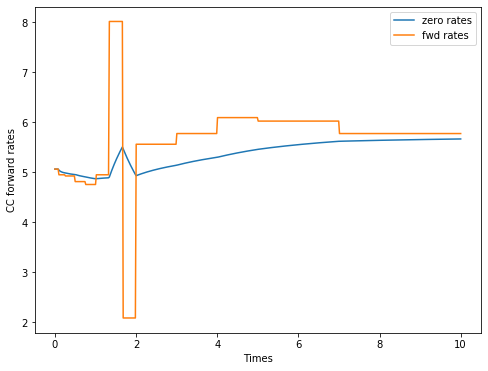

In [25]:
plt.figure(figsize=(8,6))
plt.plot(times, zeroRates*100, label="zero rates")
plt.plot(times, fwdRates*100, label = "fwd rates")
plt.xlabel("Times")
plt.ylabel("CC forward rates")
plt.legend();

We see that the forward rates are piecewise flat